Taller práctico - Python - Pandas
===

**Valentina Vasquez Hernadez**  
vavasquezhe@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia

---


## Bibliografía
[1] DANE , «DANE - Estadísticas por tema,» Julio 2018. [En línea]. Available: https://www.dane.gov.co/index.php/estadisticas-por-tema/comercio-internacional/exportaciones. [Último acceso: 4 Septiembre 2018].

## Contexto
.

<div class=text-justify> Los archivos `Exportaciones_tradicionales_AÑO` corresponden a las exportaciones colombianas de café, carbón, ferroníquel y petróleo y sus derivados, denominados como tradicionales y que representan aproximadamente el 62% de las exportaciones totales del país.[1] </div>.
<div class=text-justify> Las exportaciones se encuentran medidas en toneladas métricas que corresponde al volumen de producto en medida internacional y también el dolares FOB (Free On Board) que denota el valor de los productos en las aduanas fronterizas incluyendo el costo de impuestos, derechos de exportación, inspecciones, etc, hasta que este ha sido debidamente puesto en el transporte de salida. </div>.

<div class=text-justify>  Realice los siguientes ejercicios de acuerdo a la información contenida en los archivos mencionados y su respectivo análisis.   </div>

In [29]:
!tail Exportaciones_tradicionales_1992.csv

**Ejercicio N°1** Construya una tabla que contenga la información de todos los años. Debe contener las siguientes columnas:

* fecha
* unidad de medida
* cafe
* carbon
* petroleo y sus derivados
* ferroniquel

In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
## Se guardan los nombres de los archivos en una lista
dirs = glob.glob('Exportaciones_tradicionales_*.csv')
file = pd.DataFrame()

#Se crean tablas de pandas para concatenar la información
for i in dirs:
    g = pd.read_csv(i,sep = ';',thousands='.',skiprows=1, header=None, na_values="-")
    file = file.append(g)
    
file.columns=['fecha', 'unidad', 'cafe', 'carbon', 'petroleo', 'ferroniquel']

In [4]:
file.tail()

,fecha,unidad,cafe,carbon,petroleo,ferroniquel
9,1/03/2018,Toneladas Metricas,60532,8501830,2958676,15021
10,1/04/2018,Toneladas Metricas,61389,9579831,3258040,14186
11,1/05/2018,Toneladas Metricas,57533,7055155,3205261,16077
12,1/06/2018,Toneladas Metricas,44127,5970972,3019655,10589
13,1/07/2018,Toneladas Metricas,49660,8364156,3159031,12966


In [5]:
len(file)

638

**Ejercicio N°2** Agregue a la tabla el año y mes correspondiente en dos nuevas columnas, y elimine la columna contiene la fecha completa.

In [6]:
## Se reconoce la fecha con formato fecha para pandas
file['fecha'] =  pd.to_datetime(file['fecha'], format='%d/%m/%Y')

In [7]:
file.head()

,fecha,unidad,cafe,carbon,petroleo,ferroniquel
0,1992-01-01,Miles de Dolares FOB,108864,39350,130960,2580
1,1992-02-01,Miles de Dolares FOB,114799,56116,102964,17023
2,1992-03-01,Miles de Dolares FOB,89464,11971,139098,6689
3,1992-04-01,Miles de Dolares FOB,113535,54218,123237,2160
4,1992-05-01,Miles de Dolares FOB,118170,36989,126696,20406


In [8]:
## Se crean las columnas mes y año en la tabla
file['ano'] = file['fecha'].dt.year
file['mes'] = file['fecha'].dt.month
file_2 = file.drop('fecha', 1)
file_2.head()

,unidad,cafe,carbon,petroleo,ferroniquel,ano,mes
0,Miles de Dolares FOB,108864,39350,130960,2580,1992,1
1,Miles de Dolares FOB,114799,56116,102964,17023,1992,2
2,Miles de Dolares FOB,89464,11971,139098,6689,1992,3
3,Miles de Dolares FOB,113535,54218,123237,2160,1992,4
4,Miles de Dolares FOB,118170,36989,126696,20406,1992,5


**Ejercicio N°3** ¿Cuantos registros de la tabla son nulos?. Elimine los registros que tengan datos faltantes.

In [9]:
file_3 = file_2.convert_objects(convert_numeric=True).dropna()
len(file_2)-len(file_3)

/home/vavasquezhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


4

**Ejercicio N°4** Genere un archivo tipo texto que contenga la tabla resultante del numeral 3.

In [10]:
file_3.to_csv('Exportaciones_tradicionales.txt', sep=';')

In [11]:
file_3.head()

,unidad,cafe,carbon,petroleo,ferroniquel,ano,mes
0,Miles de Dolares FOB,108864,39350,130960,2580.0,1992,1
1,Miles de Dolares FOB,114799,56116,102964,17023.0,1992,2
2,Miles de Dolares FOB,89464,11971,139098,6689.0,1992,3
3,Miles de Dolares FOB,113535,54218,123237,2160.0,1992,4
4,Miles de Dolares FOB,118170,36989,126696,20406.0,1992,5


**Ejercicio N°5** Genere una nueva tabla que presente el consolidado de las exportaciones por año por producto y por unidad de medida, es decir, para cada año analizado se debe obtener un registro para cada una de las unidades de medida por producto. Guarde el resultado en un archivo de texto.

In [12]:
file_4 = file_3.loc[:, file_3.columns != 'mes'].groupby(['ano','unidad']).sum()
file_4.head()

cafe    carbon  petroleo  ferroniquel
ano  unidad                                                        
1992 Miles de Dolares FOB  1258847    555429   1412943     125155.0
     Toneladas Metricas     966835  14793269  12465425      48048.0
1993 Miles de Dolares FOB  1139868    564415   1323260     101898.0
     Toneladas Metricas     782259  17716683  12761908      49380.0
1994 Miles de Dolares FOB  1990136    549833   1312724     118782.0

In [13]:
file_4.to_csv('Exportaciones_tradiciones_medida.txt',sep=';')

**Ejercicio N°6** Calcule el promedio de las exportaciones por mes por producto y grafíquelo.

In [14]:
file_5 = file_3.loc[:, file_3.columns != 'ano'].groupby(['unidad','mes']).mean()
file_5

cafe        carbon      petroleo  \
unidad               mes                                              
Miles de Dolares FOB 1    147038.444444  2.746003e+05  7.647992e+05   
                     2    143206.500000  2.246442e+05  7.214277e+05   
                     3    137384.038462  2.500009e+05  8.349502e+05   
                     4    138860.111111  2.715620e+05  8.310392e+05   
                     5    138006.592593  3.360396e+05  8.825227e+05   
                     6    135769.925926  2.695717e+05  8.495897e+05   
                     7    133510.074074  2.994721e+05  8.654846e+05   
                     8    131817.538462  2.802016e+05  8.471858e+05   
                     9    125846.000000  2.749238e+05  8.401538e+05   
                     10   136910.115385  2.608843e+05  8.518688e+05   
                     11   152920.230769  2.463058e+05  7.967336e+05   
                     12   178863.730769  3.013830e+05  8.388625e+05   
Toneladas Metricas   1     51382.592593  4.254662e+06  2.268399e+06   
                     2     52409.269231  3.775030e+06  2.081120e+06   
                     3     47620.807692  4.013086e+06  2.316541e+06   
                     4     48992.333333  4.398257e+06  2.229598e+06   
                     5     47924.148148  5.405569e+06  2.317494e+06   
                     6     47873.037037  4.290906e+06  2.253212e+06   
                     7     46786.407407  4.699232e+06  2.291068e+06   
                     8     45682.846154  4.567165e+06  2.289765e+06   
                     9     43654.692308  4.505178e+06  2.240536e+06   
                     10    49467.615385  4.131978e+06  2.357902e+06   
                     11    56362.269231  4.134796e+06  2.193686e+06   
                     12    64549.192308  4.933106e+06  2.442022e+06   

                           ferroniquel  
unidad               mes                
Miles de Dolares FOB 1    33479.765630  
                     2    34510.412962  
                     3    37961.038462  
                     4    41546.689333  
                     5    50199.873593  
                     6    41245.813852  
                     7    36436.387778  
                     8    39048.750769  
                     9    38402.034654  
                     10   40213.115385  
                     11   40136.848615  
                     12   45357.795269  
Toneladas Metricas   1     7999.422370  
                     2     7913.291692  
                     3     8860.923077  
                     4     7906.265074  
                     5     9485.009778  
                     6     8189.019963  
                     7     7809.452444  
                     8     8451.807346  
                     9     8400.791577  
                     10    8012.230769  
                     11    8369.370500  
                     12    9235.870385

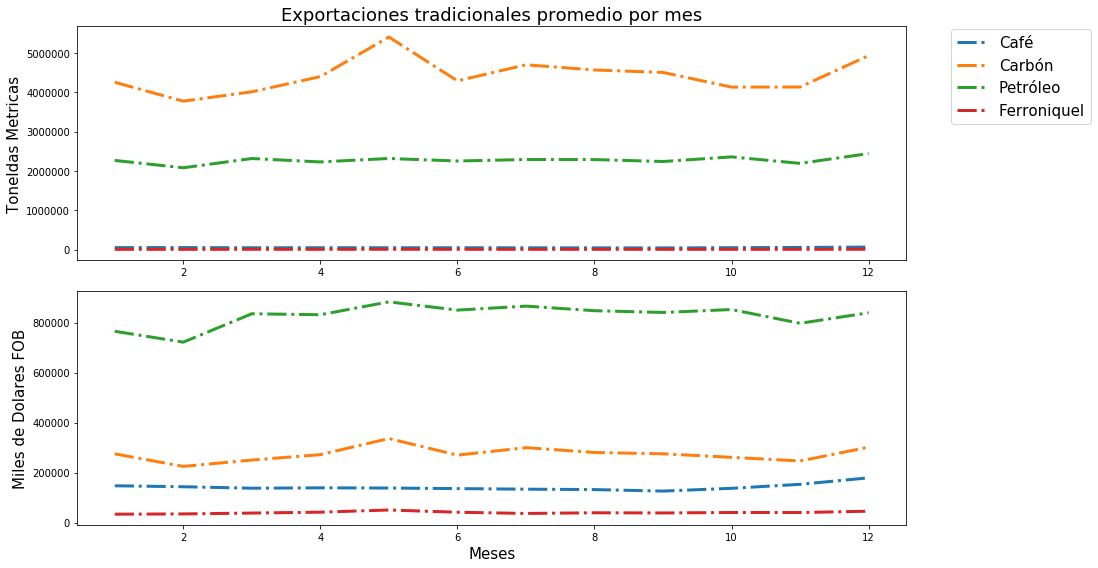

In [16]:
plt.figure(figsize=(15, 8))

plt.subplot(2,1,1)
p1 = plt.plot(file_5.loc['Toneladas Metricas'],linestyle='dashdot', markersize=12, linewidth=3)
plt.title("Exportaciones tradicionales promedio por mes", fontsize=18)  # Establece el título del gráfico
plt.ylabel("Toneldas Metricas", fontsize=15)   # Establece el título del eje y
plt.legend((p1[0], p1[1], p1[2], p1[3]), ('Café', 'Carbón', 'Petróleo', 'Ferroniquel'),
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2, prop={'size': 15})


plt.subplot(2,1,2)
plt.plot(file_5.loc['Miles de Dolares FOB'],linestyle='dashdot', markersize=12 ,linewidth=3)
plt.xlabel("Meses", fontsize=15)   # Establece el título del eje x 
plt.ylabel("Miles de Dolares FOB", fontsize=15)   # Establece el título del eje y


plt.subplots_adjust(left=0.6, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()

**Ejercicio N°7** Calcule el total de exportaciones tradicionales por año por unidad de medida y grafíquelo. ¿Qué se infiere de los resultados?

In [17]:
file_6 = file_3.loc[:, file_3.columns != 'mes'].groupby(['unidad','ano']).sum()
file_7 = file_6.loc['Miles de Dolares FOB'].T.sum()
file_8 = file_6.loc['Toneladas Metricas'].T.sum()

/home/vavasquezhe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


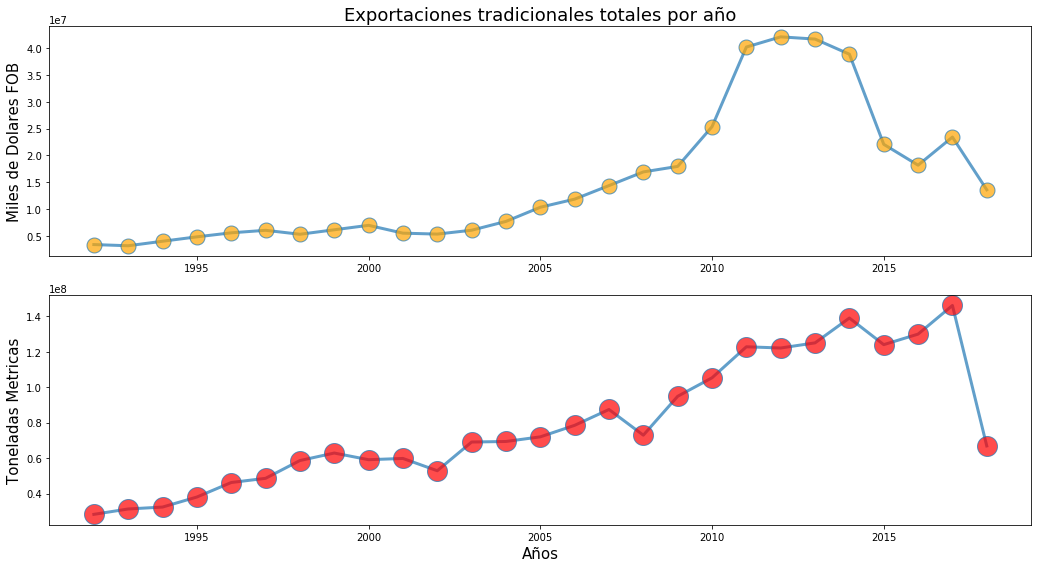

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.plot(file_7, '-o', ms=15, lw=2, alpha=0.7, mfc='orange',linewidth=3)
plt.title("Exportaciones tradicionales totales por año", fontsize=18)  # Establece el título del gráfico
plt.ylabel("Miles de Dolares FOB", fontsize=15)   # Establece el título del eje y


plt.subplot(2,1,2)
plt.plot(file_8, '-o', ms=20, lw=2, alpha=0.7, mfc='red',linewidth=3)
plt.xlabel("Años", fontsize=15)   # Establece el título del eje x 
plt.ylabel("Toneladas Metricas", fontsize=15)   # Establece el título del eje y


plt.subplots_adjust(left=0.6, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()

**Ejercicio N°8** Calcule el total de exportaciones tradicionales por mes por unidad de medida y grafíquelo.

In [19]:
file_9 = file_3.loc[:, file_3.columns != 'ano'].groupby(['unidad','mes']).sum()

/home/vavasquezhe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


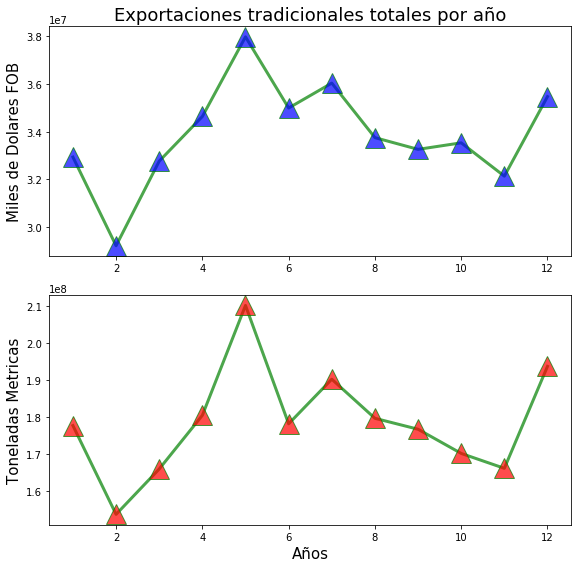

In [20]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(file_9.loc['Miles de Dolares FOB'].T.sum(), 'g^-', ms=20, lw=2, alpha=0.7, mfc='blue',linewidth=3)
plt.title("Exportaciones tradicionales totales por año", fontsize=18)  # Establece el título del gráfico
plt.ylabel("Miles de Dolares FOB", fontsize=15)   # Establece el título del eje y


plt.subplot(2,1,2)
plt.plot(file_9.loc['Toneladas Metricas'].T.sum(), 'g^-', ms=20, lw=2, alpha=0.7, mfc='red',linewidth=3)
plt.xlabel("Años", fontsize=15)   # Establece el título del eje x 
plt.ylabel("Toneladas Metricas", fontsize=15)   # Establece el título del eje y


plt.subplots_adjust(left=0.6, wspace=0.8, top=0.8)
plt.tight_layout()
plt.show()

**Ejercicio N°8** Calcule la cantidad máxima de toneladas métricas que se han exportado en un año por cada producto y el año en que se produjo.

In [21]:
temp = file_3.loc[:, file_3.columns != 'mes'].groupby(['unidad','ano']).max().loc['Toneladas Metricas']
g = temp.max()
g

cafe             113391.0
carbon         14736902.0
petroleo        4593090.0
ferroniquel       24080.0
dtype: float64

In [22]:
temp[temp['cafe']==g[0]]

,cafe,carbon,petroleo,ferroniquel
ano,,,,
2016,113391,11912907,4099192,15419.0


In [23]:
temp[temp['cafe']==g[0]].index.values[0]

2016

In [24]:
data = ['cafe','carbon','petroleo','ferroniquel']
num = [0,1,2,3]; o= []; p=[]

for i in num:
    p=[]
    h = temp[temp[data[i]]==g[i]].index.values[0]
    j = g.data[i]
    p.append(h);p.append(j);p.append(data[i])
    o.append(p)
o

/home/vavasquezhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


[[2016, 113391.0, 'cafe'],
 [2017, 14736902.0, 'carbon'],
 [2015, 4593090.0, 'petroleo'],
 [2007, 24080.0, 'ferroniquel']]

**Ejercicio N°9** Construya un histograma que muestre cuantas veces un producto ha tenido la cantidad máxima de toneladas en cada mes.

In [25]:
t = file_3.loc[:, file_3.columns != 'ano']
file_new = t.loc[:, t.columns != 'mes']
file_new = file_new[file_new['unidad'].str.contains("Miles de Dolares FOB")]
file_new = file_new.loc[:, file_new.columns != 'unidad']

In [26]:
liss = []
for j in range(0,len(file_new)):
    dato = 0
    x = []
    l = 0
    for k in range(0,4):
        dato = file_new.iloc[j,k]
        x.append(dato)
    maxii= max(x)
    ind = x.index(maxii)
    liss.append(ind)

In [27]:
y = []
b = 0
for i in liss:
    if i == 0:
        b = 'cafe'
    elif i == 1:
        b = 'carbon'
    elif i == 2:
        b = 'petroleo'
    else: b= 'ferroniquel'
    y.append(b)

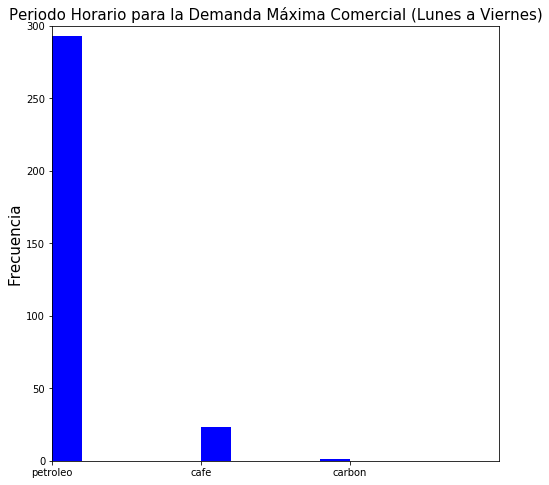

In [28]:
plt.figure(figsize=(8,8))
plt.hist(y, facecolor='b', color = 'g')
plt.xlim(0, 3)
plt.ylabel('Frecuencia',fontsize=15)
plt.title('Periodo Horario para la Demanda Máxima Comercial (Lunes a Viernes)',fontsize=15)
plt.axis([0, 3, 0, 300])
plt.show()

---

Taller práctico - Python - Pandas
===

**Valentina Vasquez Hernadez**  
vavasquezhe@unal.edu.co   
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia


